In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
r = np.array([0.4,0.5,0.6,0.7,0.8,0.9])

acM = []; defM = []

for i in np.arange(0.4,1.0,0.1):
    ac_ = pd.read_csv('v11aData/acBm'+str(round(i,1))+'_273s5.csv',names=['bm'])
    def_ = pd.read_csv('v11aData/defBm'+str(round(i,1))+'_273s5.csv',names=['bm'])
    acM.append(ac_)
    defM.append(def_)

In [3]:
r2 = np.array([0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
ac_def = pd.read_csv('v11aData/v11aRmtrs_std273s5.csv', names=['spec1','dev1','spec2','dev2'])

/home/nitta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
/home/nitta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dip" which is no longer supported as of 3.3 and will become an error two minor releases later


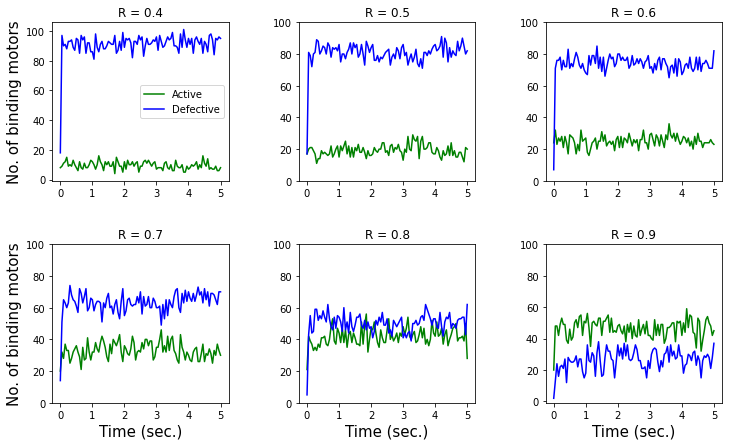

In [4]:
f = plt.figure(figsize=(12,7))
#plt.style.use('ggplot') # like R figures *

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

x = np.linspace(0,5,101)
rs = 0.4

for i in range(0,6):
    f.add_subplot(2,3,i+1)
    plt.plot(x,acM[i]['bm'].T[0::5], color='green', label='Active')
    plt.plot(x,defM[i]['bm'].T[0::5], color='blue', label='Defective')
    plt.xticks(np.arange(0,6,1))
    plt.yticks(np.arange(0,110,20))
    plt.title('R = '+str(round(rs,1))); rs+=0.1
    if i>2:
        plt.xlabel('Time (sec.)', fontsize=15)
    if i==0 or i == 3:
        plt.ylabel('No. of binding motors', fontsize=15)
    if i==0:
        plt.legend()
        
#plt.savefig('fig/v11aBindingMotors.svg', fmt='svg', dip='1200', bbox_inches='tight')
plt.savefig('fig/v11aBindingMotors.png', fmt='png', dip='1500', bbox_inches='tight')
plt.show()

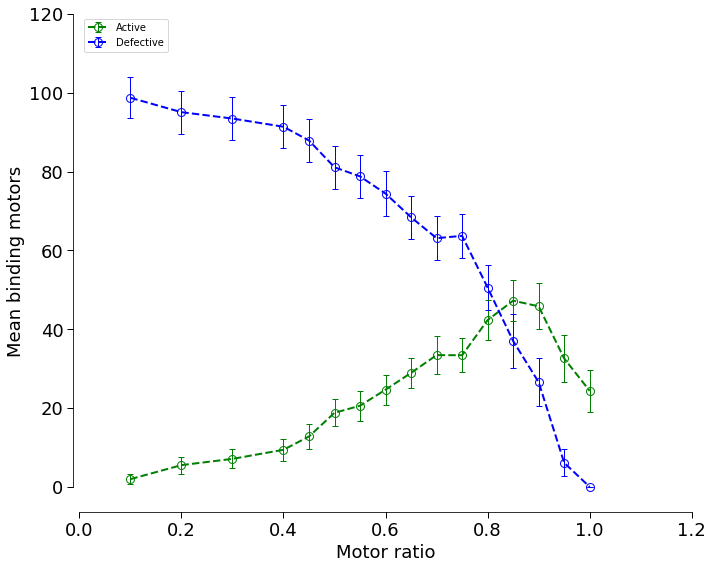

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *

ax.errorbar(r2,ac_def['spec1'],ac_def['dev1'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Active')
ax.errorbar(r2,ac_def['spec2'],ac_def['dev2'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Defective')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,120)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,121,20))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Mean binding motors', fontsize=18)
ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/v11aBindingMotorRatio.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/v11aBindingMotorRatio.png', fmt='png', dip='1500', bbox_inches='tight')
plt.show()